# Деревья решений

✍ В этом юните мы познакомимся с ещё одним семейством моделей машинного обучения — деревьями решений. Для начала поговорим о том, что такое дерево решений и как с его помощью решают задачу классификации.

Деревья решений являются одним из наиболее понятных человеку и в то же время мощных алгоритмов принятия решений. К тому же на их основе строятся самые эффективные ансамблевые модели машинного обучения, такие как случайный лес, о котором мы поговорим далее.

Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. В этом модуле мы разберём задачу классификации, а в дальнейшем, когда будем разбирать математическую составляющую алгоритмов, поговорим о том, как научить дерево решать задачу регрессии.

**Если коротко, решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.**

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ДЕРЕВЕ РЕШЕНИЙ

Начнём сразу с примера.

Представьте, что у вас есть автомобиль, который вы решили застраховать. Вы приходите в страховую компанию, где вам дают заполнить анкету. По этой анкете сотрудник страховой компании будет принимать решение, стоит ли выдавать вам страховку.

Сотрудник в свою очередь будет руководствоваться примерно следующим регламентом:

- Если возраст владельца > 40 лет, то:
    - Если место эксплуатации автомобиля — город, то:

        - Если стаж > 10 лет, то:
            - Застраховать.
        - Если стаж < 10 лет, то:
            - Не страховать.

    - Если место эксплуатации автомобиля — сельская местность, то:
        - Застраховать.

- Если возраст владельца ≤ 40 лет, то:
    - Если аварий не было зафиксировано, то:
        - Застраховать.

    - Если были аварии, то:
        - Если тип автомобиля — минивэн, то:
            - Застраховать.
        - Если тип автомобиля — спорткар, то:
            - Не страховать.
            
То есть сотрудник при принятии решения использует информацию, предоставленную вами в анкете, и подает её на вход вложенного условного оператора.

Для простоты восприятия можно представить такой подход визуально в виде следующего дерева:

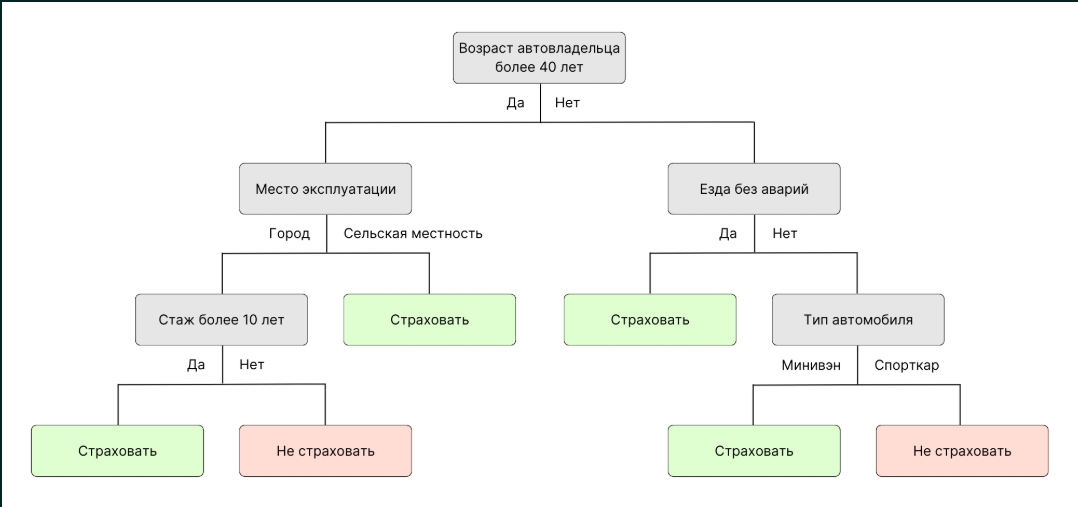

Аналогичным образом работает и алгоритм машинного обучения под названием **«дерево решений» (Decision Tree).** 

Если дерево уже обучено, то есть уже сформулированы условия в прямоугольниках, то, когда в страховую компанию придёт новый автовладелец, сотруднику будет достаточно прогнать данные клиента через дерево решений и таким образом принять решение, то есть произвести классификацию.

Вот ещё один пример дерева решений. Большинство из нас когда-нибудь играли в игру «Слова на лбу» или «Тарантинки». На лоб каждого из игроков приклеивается бумажка с написанным на ней словом. Игрок может задавать другим игрокам вопросы о загаданном ему предмете/животном/человеке и т. д. Другие игроки могут отвечать на вопросы только «Да» и «Нет». **Цель** — за минимальное количество вопросов догадаться, о чём идёт речь.

Логика «если …, то …» используется людьми повседневно и поэтому интуитивно понятна каждому из нас. На основании этих рассуждений можно построить мощный алгоритм машинного обучения.

Успешнее всего деревья применяют в следующих областях:

- **Банковское дело.** Оценка кредитоспособности клиентов банка при выдаче кредитов.
- **Промышленность.** Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.
- **Медицина.** Диагностика заболеваний разной сложности.
- **Молекулярная биология.** Анализ строения аминокислот.
- **Торговля.** Классификация клиентов и товара.

Теперь перейдём к формальной части. Нам важно уже сейчас познакомиться с терминологией деревьев решений, чтобы понять общий принцип их обучения.

Пусть у нас есть всё та же матрица наблюдений X, в которой содержатся наблюдения и характеризующие их признаки (привычный нам DataFrame), и правильные ответы y — метки классов. 

Дадим определение дереву решений и его составляющим ↓

Формально структура дерева решений — это **связный ациклический граф.** Что это значит?

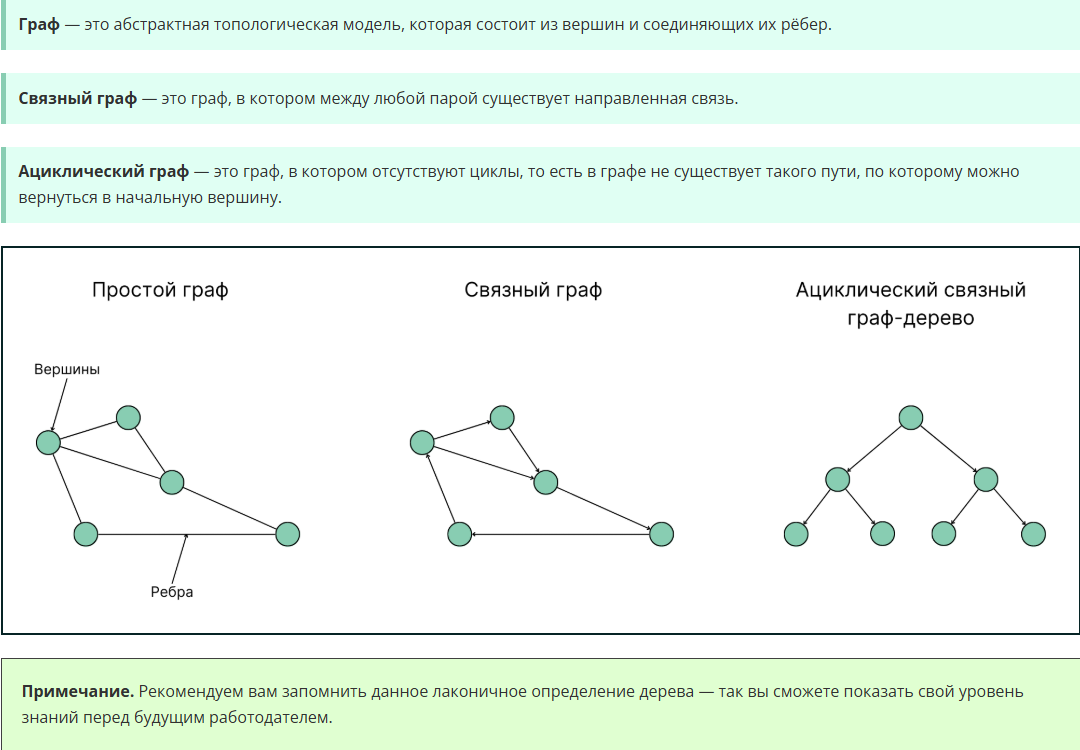

В дереве решений можно выделить **три типа вершин:**

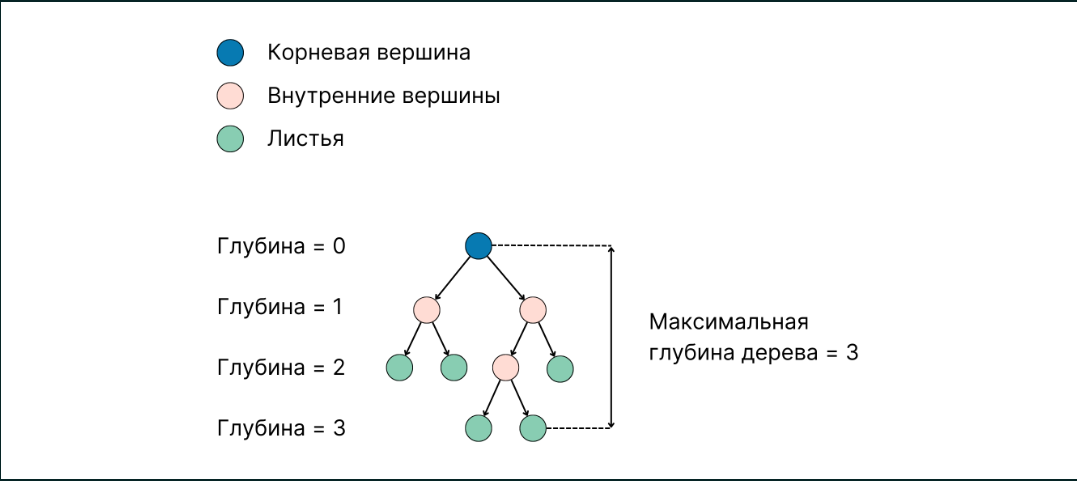

- **Корневая вершина (root node)** — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».
- **Внутренние вершины (intermediate nodes)** — это дополнительные уточняющие вопросы, которые дерево задаёт объекту. 
- **Листья (leafs)** — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется **максимальной глубиной дерева (max depth).**

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву. Например, «Количество кредитов  <=1». 

Логический критерий, который находится в каждой вершине, называется **предикатом**, или **решающим правилом.**

На самом деле все предикаты — это просто взятие порога по значению какого-то признака. Формально это записывается следующим образом:



Предикат вершины дерева ***Bv***  (где  ***v*** — это номер вершины) равен 1 («Да»), если признак ***xj*** меньше либо равен значению ***t***, и 0 («Нет») — в противном случае. Функция ***I*** с квадратными скобками — это уже знакомая нам индикаторная функция: она равна 1, если условие внутри скобок выполняется, и 0 — в противном случае.

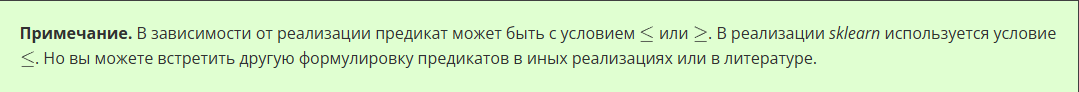

Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.


**А что насчёт геометрии?**

Каждый новый вопрос дерева решений при его обучении разбивает пространство признаков на две части: в первую часть отправляются наблюдения, для которых предикат истинен, а во вторую — для которых он ложен.

Посмотрим, как это будет выглядеть, на примере. 

Вам уже знакома задача классификации про ирисы. Ирисы Фишера — это задача, на которой Рональд Фишер ещё в 1936 году (почти 100 лет назад!) продемонстрировал работу алгоритма, разделяющего ирисы на сорта в зависимости от параметров долей околоцветника.

Пусть у нас есть следующие признаки:

- длина внутренней доли околоцветника (англ. petal length);
- ширина внутренней доли околоцветника (англ. petal width).
На основании этих двух признаков требуется разделить ирисы на три сорта:

- ирис щетинистый (Iris Setosa);
- ирис виргинский (Iris virginica);
- ирис разноцветный (Iris versicolor).

Пусть мы обучили на этих данных дерево решений с максимальной глубиной 2. Оно получилось вот таким:

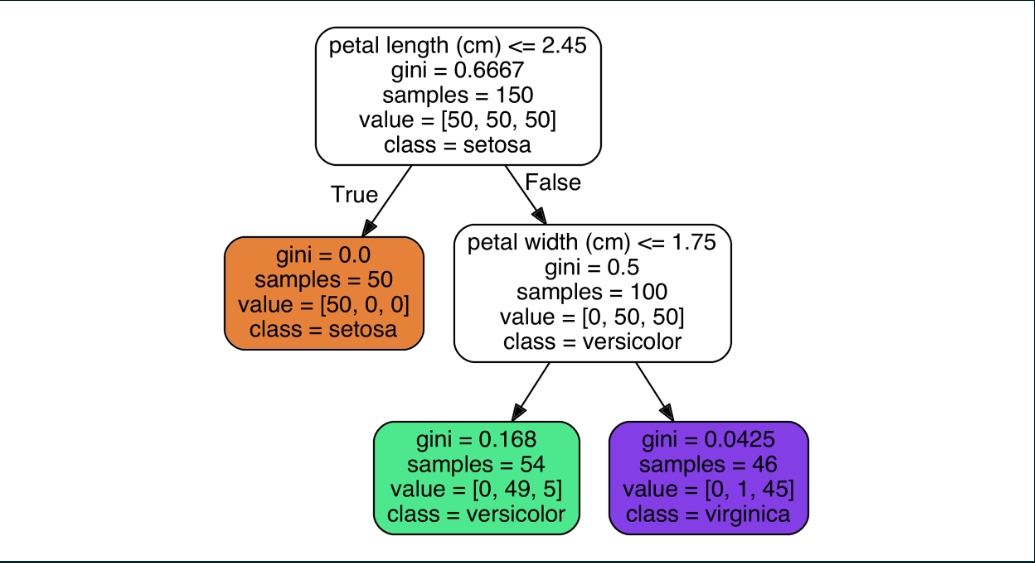

В каждом блоке указаны следующие данные:

- *Предикат* ***I[xj<=t]*** — условие, по которому выборка делится на две части: на ту, для которой условие выполняется, и ту, для которой не выполняется.

- *gini* — критерий информативности Джини, о котором мы поговорим чуть позже.

- *samples* — количество объектов, которые мы проверяем на данном шаге.

- *value* — распределение по классам для объектов, которые мы проверяем на данном шаге: например *value=[0, 50, 50]* означает, что на текущем этапе разделения в выборке находится 0 объектов класса *setosa* и по 50 объектов классов *versicolor* и *virginica.*

- *class* — класс, который мы присваиваем, если завершим выполнение алгоритма на данном шаге.

А вот так будет выглядеть наш процесс разделения цветов на классы:

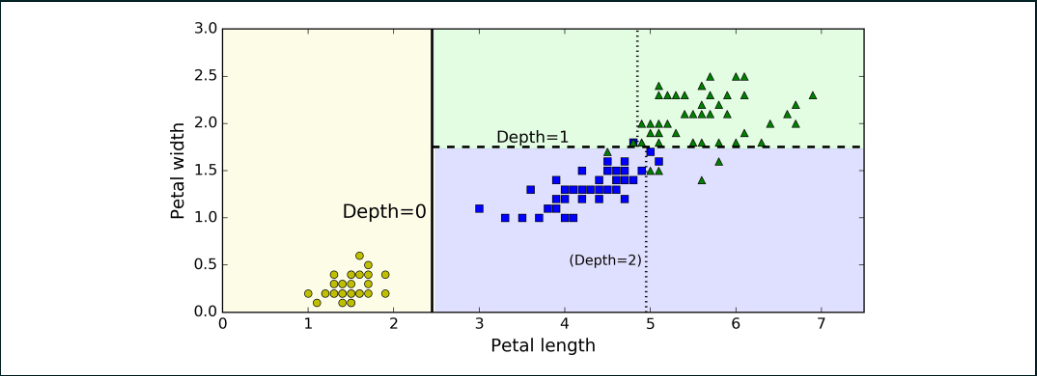

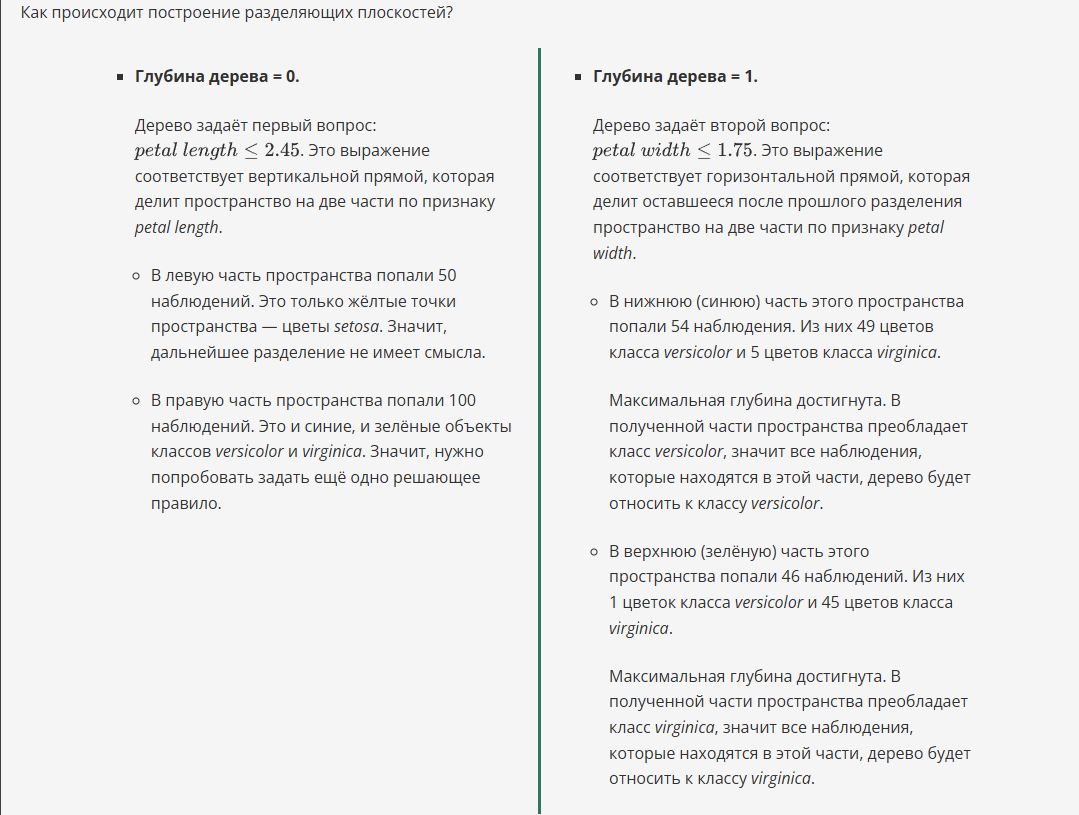

Отметим, что деление пространства можно продолжать до тех пор, пока пространство не будет разделено так, чтобы верно выделить каждый из классов. 

Кстати, для каждой области можно подсчитать вероятность каждого из классов. Это просто отношение количества объектов ***k*** -класса, которые попали в лист дерева, к общему количеству объектов в листе.

Например, для синей области вероятности будут равны:

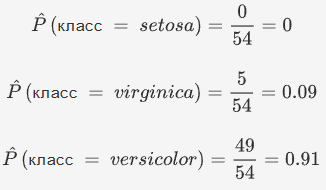

Теперь, когда мы разобрались с терминологией и геометрией, давайте поговорим о том, как строится решающее дерево.

### Задание 6.1

Что представляет собой структура дерева решений?

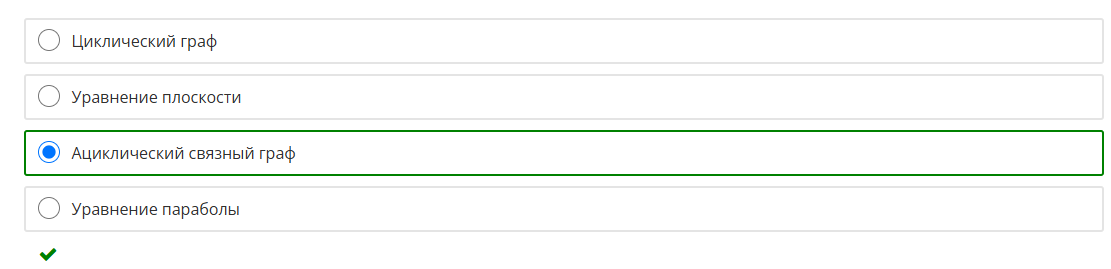

### Задание 6.2

Как называется записанное в вершине дерева условие, которое делит выборку, пришедшую в вершину, на две части?

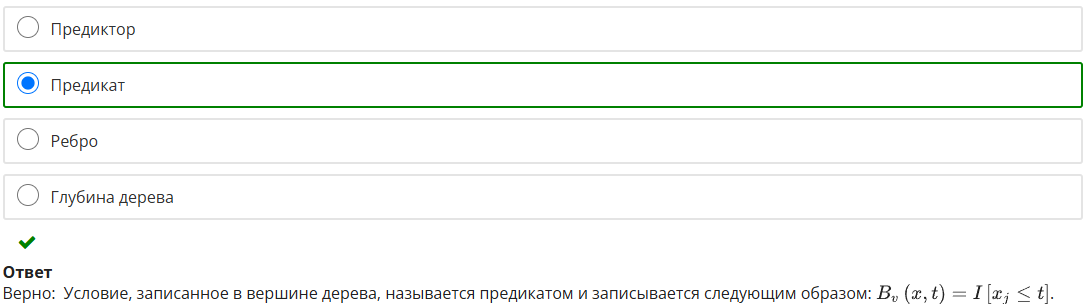

### Задание 6.3

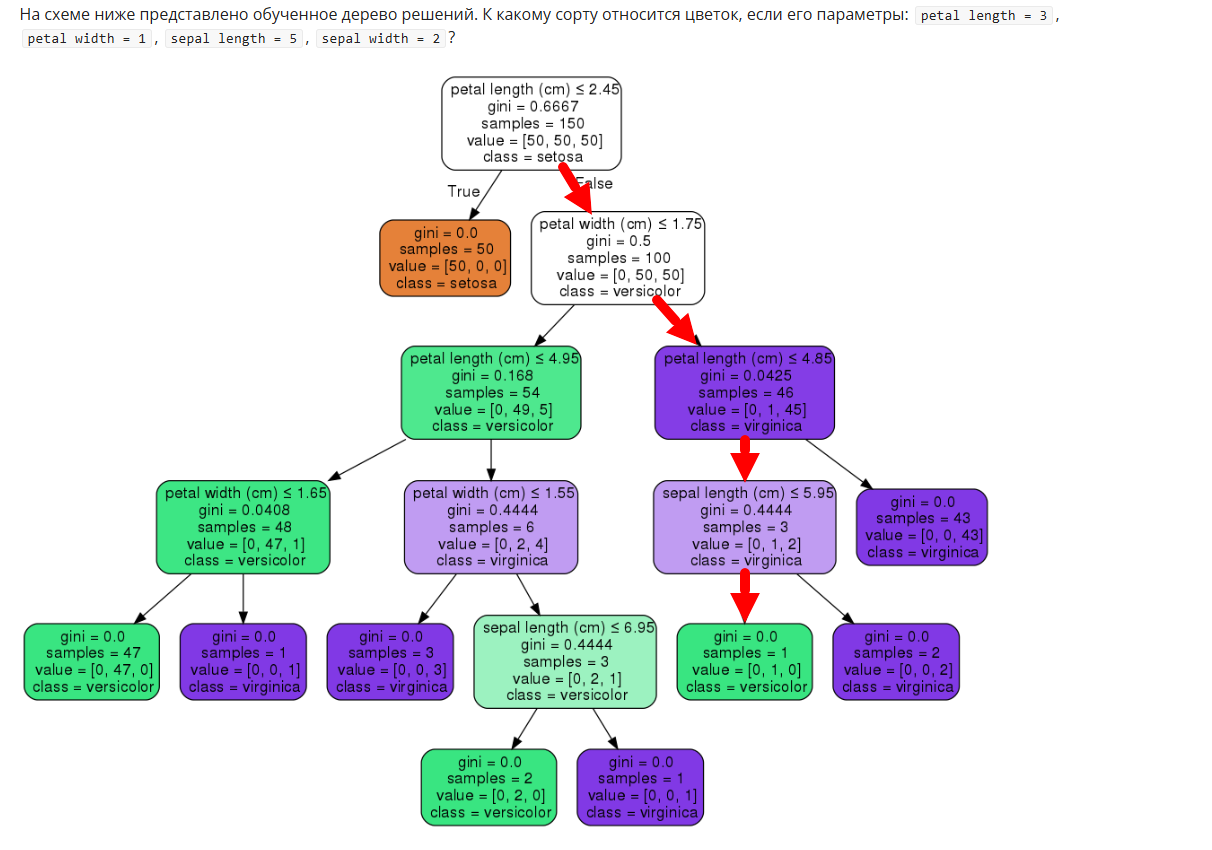

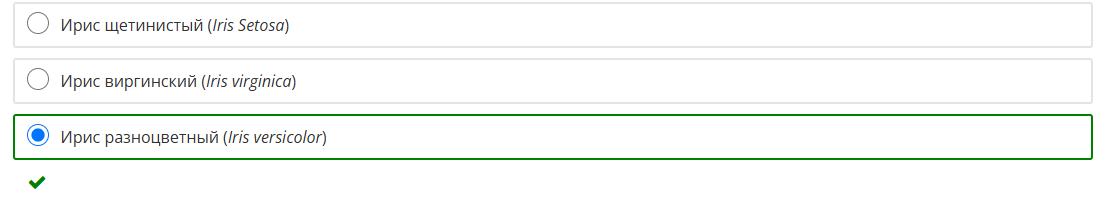

### Задание 6.4

Чему равна максимальная глубина дерева из предыдущего задания?

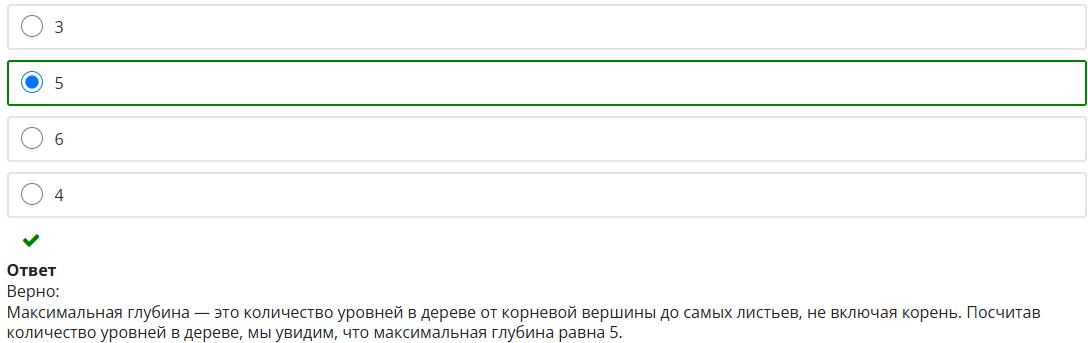

## ПРОЦЕСС ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ

✍ Существует множество [стратегий](https://scikit-learn.ru/1-10-decision-trees/#tree-algorithms-id3-c4-5-c5-0-and-cart) построения деревьев решений. Мы рассмотрим стратегию, реализованную в библиотеке sklearn, — алгоритм CART (Classification and Regression Tree), который предназначен для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

Внимательный студент уже заметил, что построение дерева решений можно описать рекурсией. Каждая вершина дерева порождает две других вершины, а они в свою очередь порождают новые вершины, и так происходит до тех пор, пока не выполнится некоторый критерий остановки, например в вершине не останутся только наблюдения определённого класса.

**Примечание.** Если вы забыли, что такое рекурсия, рекомендуем вам вернуться к [модулю по продвинутому использованию функций](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/0319d979a24a43c7832f71cdd4177a78) и активировать рекурсивное мышление, оно нам понадобится.

Пусть у нас есть матрица наблюдений X и столбец с ответами — метками классов y. На основе примеров и ответов мы хотим построить дерево решений, которое будет производить классификацию.

Итак, псевдокод рекурсивной функции для построения решающего дерева будет выглядеть следующим образом *(запускать код не нужно, так как он является абстрактным)*:

In [ ]:
def build_decision_tree(X, y):
    node = Node()
    if stopping_criterion(X, y) is True:
        node = create_leaf_with_prediction(y)
	return node
    else:
        X_left, y_left, X_right, y_right = best_split(X, y)
        node.left = build_decision_tree(X_left, y_left)
        node.right = build_decision_tree(X_right, y_right)

**Разберёмся, как работает алгоритм:**

1. Создать новую вершину node. На первой итерации это будет корневая вершина. На последующих это будут внутренние вершины.

2. Проверить некоторый критерий остановки stop_criterion().

Например, критерием остановки может быть следующее условие: все объекты, которые попали в вершину, — это объекты одного и того же класса.

Или достигнута максимальная глубина дерева (max_depth), например 5. Это значит, что дерево не будет продолжать делиться, если глубина уже равна 5.

Другой критерий: число наблюдений в листе (в sklearn этот параметр обозначен как min_samples_leaf) меньше заданного, например 7. Это значит, что при выполнении такого условия дерево продолжит делиться в том случае, если решающее правило выполняется как минимум для 7 наблюдений.

**2.1. Если условие остановки выполняется:**

Проверить, какой класс преобладает в текущей вершине. Превратить текущую вершину дерева в лист, где всем наблюдениям, которые попали в эту вершину, присвоить метку преобладающего класса.

Прекратить построение дерева, вернув из алгоритма полученный лист.

**2.2. Если условие остановки не выполняется:**

Среди всех возможных предикатов ***Bv(x,t) = I[xj<=t]*** найти такой, который обеспечивает разбиение выборки наилучшим образом.

То есть нужно найти такой признак ***xj*** и пороговое значение ***t***, при которых достигается максимум некоторой информативности (существуют разные меры информативности, о них поговорим ниже). Назовём эту часть алгоритма некоторой абстрактной функцией *best_split()*.

Например, в нашем примере с ирисами это был предикат ***Petal.Length < = 2.45***. Он обеспечил наилучшее разделение пространства на две части.

В результате разбиения будут созданы два набора данных:

- X_left, y_left (левый), для которого выполняется условие ***xj <= t***;

- X_right, y_right (правый), для которого условие не выполняется.

Создаются две новые вершины: левая и правая, в каждую из которых отправляется соответствующий набор данных.

То есть происходит рекурсивный вызов функции build_decision_tree(), и для каждой новой вершины алгоритм повторяется вновь с новым набором данных.


**Примечание.** Вершина дерева node задаёт целое поддерево идущих за ним вершин, если такие имеются, а не только саму вершину.

Центральный момент в построении дерева решений по обучающему набору данных — найти такой предикат ***Bv(x,t) = I[xj<=t]***, который обеспечит наилучшее разбиение выборки на классы. 

Как дерево определяет, какой вопрос нужно задать в каждой из вершин? 

Например, в задаче кредитного скоринга мы можем задавать множество различных вопросов в разной последовательности. Предикаты ***B0*** в первой вершине могут быть различными:

- возраст заёмщика <= 25 лет,
- возраст заёмщика <= 40 лет,
- размер кредита <= 1000 $,
- наличие детей <= 0.5 (если наличие детей — бинарный категориальный признак: 1 — есть дети, 0 — нет детей),
- и так далее.

Видно, что на место ***xj*** и ***t*** можно подставить любой признак и порог соответственно.

Признак ***xj*** и его пороговое значение ***t*** в каждой из вершин и есть внутренние параметры дерева решений, которые мы пытаемся отыскать. Это аналог коэффициентов уравнения линейной и логистической регрессий. 

***Какие же и в какой последовательности нужно задавать вопросы, или как подобрать оптимальные параметры дерева?***

### Задание 6.5

Что происходит с вершиной, для которой выполняется условие остановки?

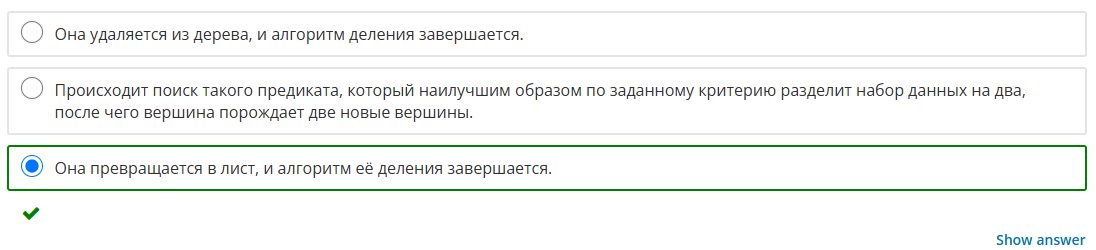

### Задание 6.6

Что происходит с вершиной, для которой **не** выполняется условие остановки?

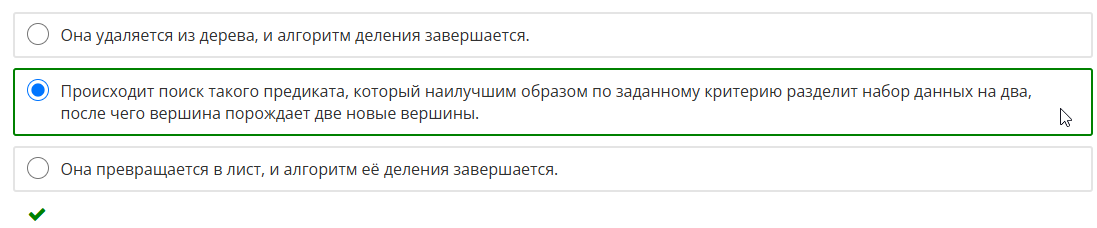

## ПОИСК ПАРАМЕТРОВ ДЕРЕВА РЕШЕНИЙ

→ Обратите внимание, что внутренние параметры дерева решений кардинально отличаются от линейных моделей.

В линейных моделях мы пытались найти такие коэффициенты в уравнениях, при которых наблюдался минимум функции потерь.

В деревьях же мы пытаемся выбрать такие признаки ***xj*** и их пороговые значения ***t***, при которых произойдёт разделение набора на две части по какому-то критерию наилучшим образом. В нашем псевдокоде этот процесс организован в виде функции *best_split().*

→ Важно понимать, что дерево решений — это топологический алгоритм, а не аналитический, то есть структуру дерева не получится описать в виде формулы, как те же линейные модели. Поэтому про стандартные методы оптимизации, такие как градиентный спуск или тем более метод наименьших квадратов, можно забыть. 

Чтобы интуитивно понять, как организуется поиск параметров, вспомним про игру «Слова на лбу».

Пусть один человек загадывает знаменитость, а второй пытается отгадать, задавая только вопросы, на которые можно ответить «Да» или «Нет» (опустим варианты «не знаю» и «не могу сказать»).

Какой вопрос отгадывающий задаст первым делом? Конечно, такой, который лучше всего уменьшит количество оставшихся вариантов.

К примеру, вопрос «Это Анджелина Джоли?» в случае отрицательного ответа оставит более 7.5 миллиардов вариантов для дальнейшего перебора (строго говоря, поменьше, ведь не каждый человек — знаменитость, но всё равно немало), а вот вопрос «Это женщина?» отсечёт уже около половины знаменитостей.

То есть, признак пол намного лучше разделяет выборку людей, чем признак *это Анджелина Джоли, национальность — испанец или любит футбол.*

Интуитивно это соответствует уменьшению некоторой неопределённости, или, иначе говоря, повышению прироста информативности.

В случае «угадайки» знаменитостей критериев отбора может быть бесчисленное количество. Но когда мы работаем с набором данных, у нас ограниченное количество признаков и для них есть ограниченное количество порогов. Тогда мы можем полным перебором найти такую комбинацию ***j*** и ***t***, которая обеспечит наилучшее уменьшение неопределённости.

Неопределённость можно измерять различными способами, в деревьях решений для этого используются **энтропия Шеннона** и **критерий Джини**. Мы подробно обсудим их реализацию в модулях по математике.

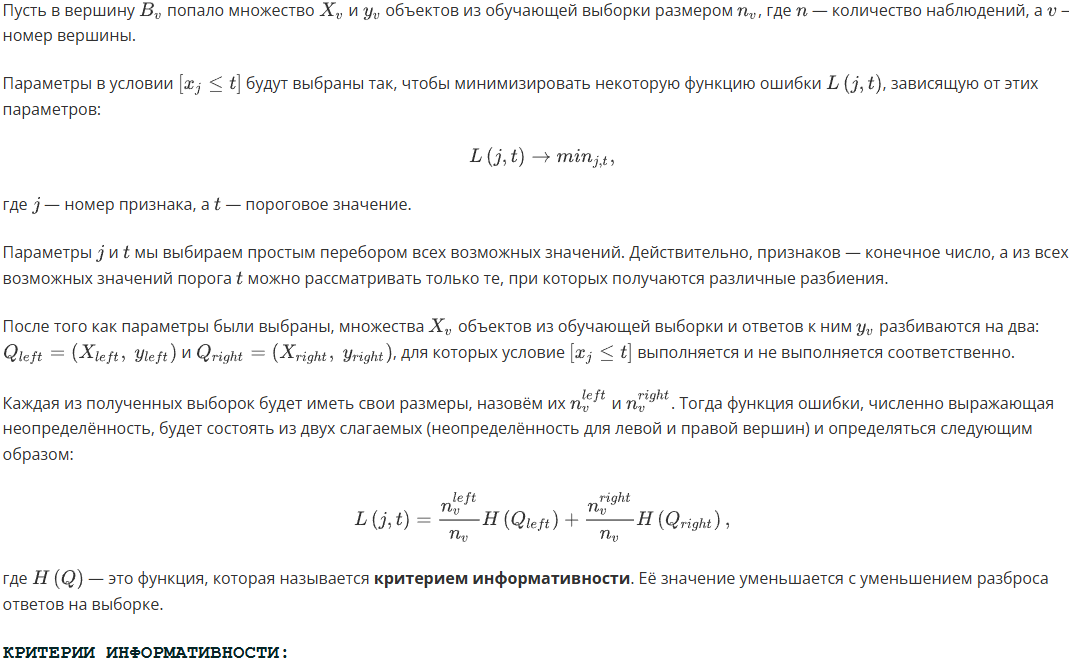
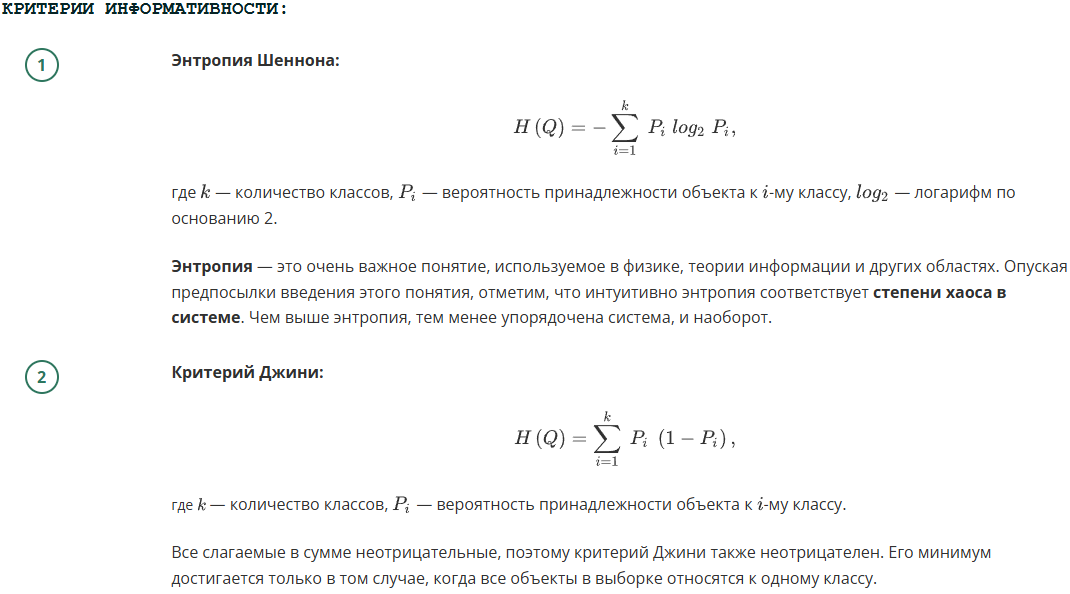
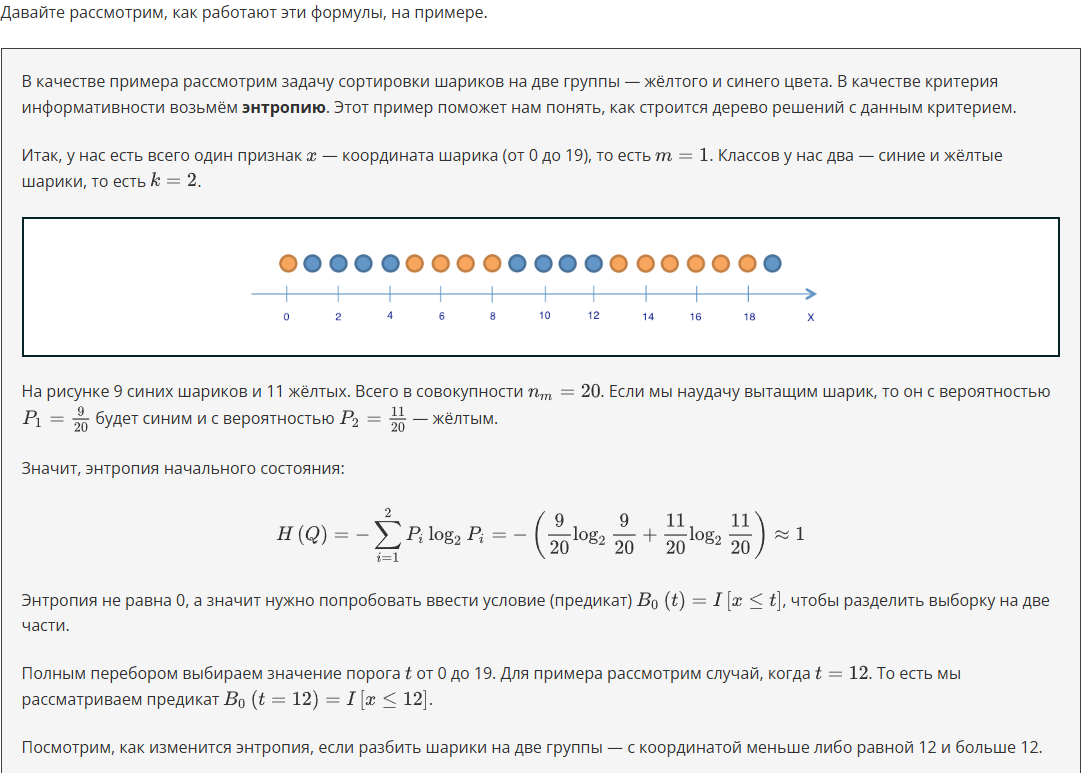
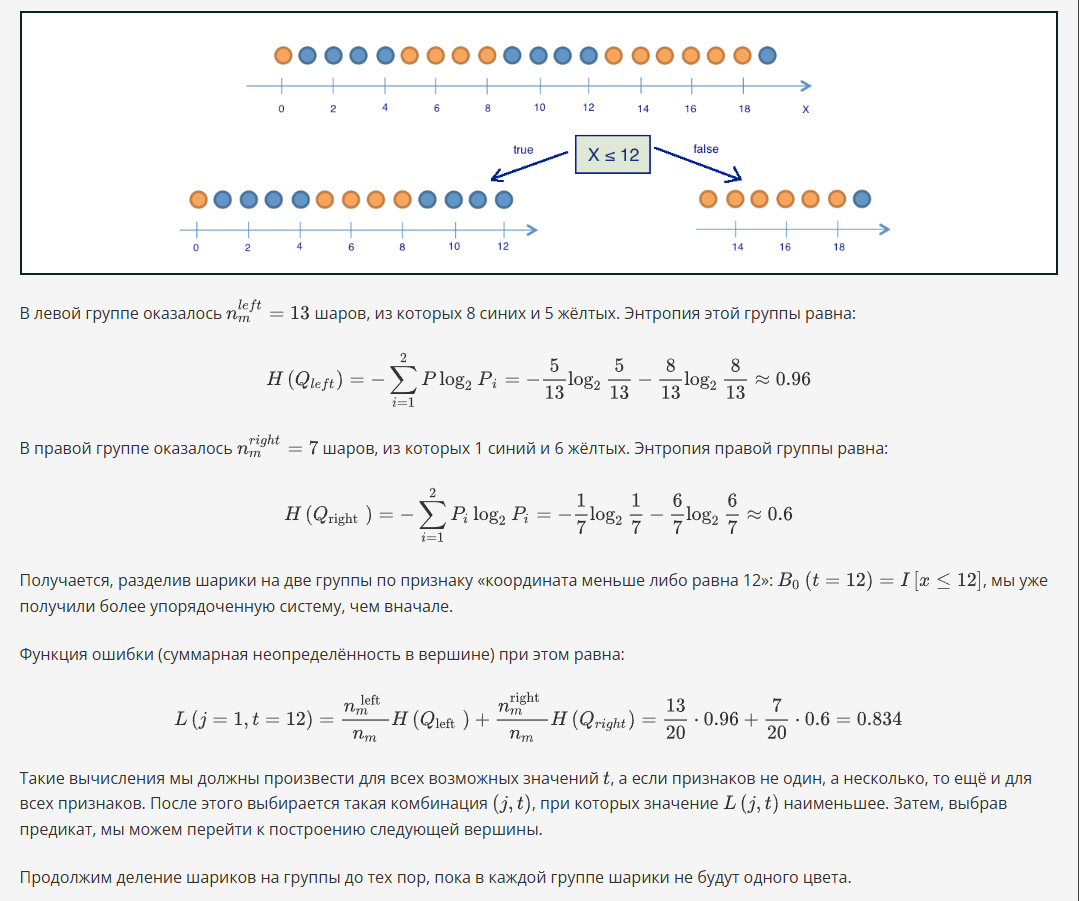
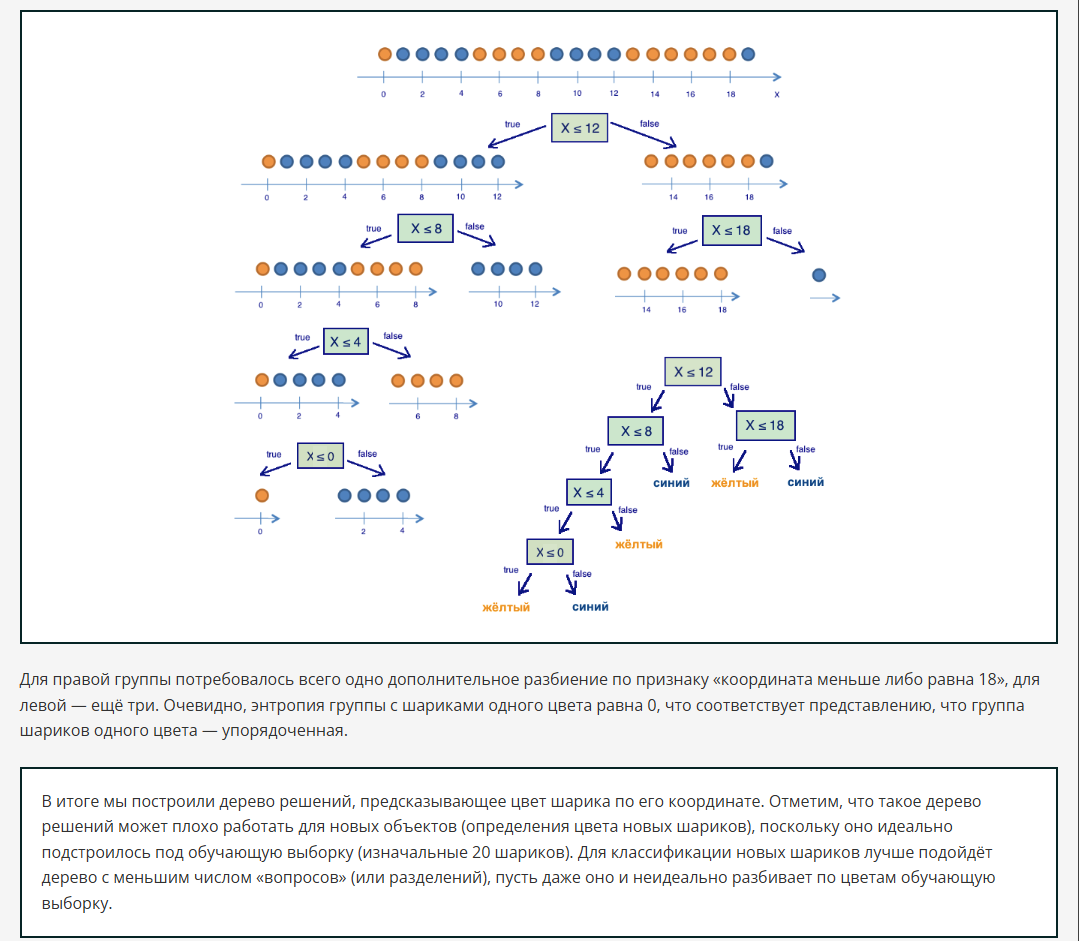

### Задание 6.7

Как происходит поиск оптимального предиката дерева ***Bv(xj, t)***?

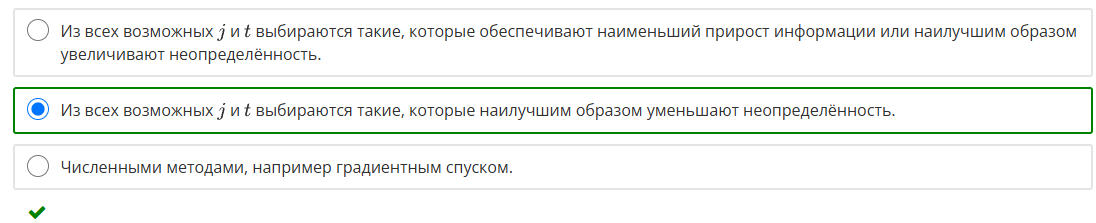

### Задание 6.8

Какие критерии информативности используются в деревьях решений?

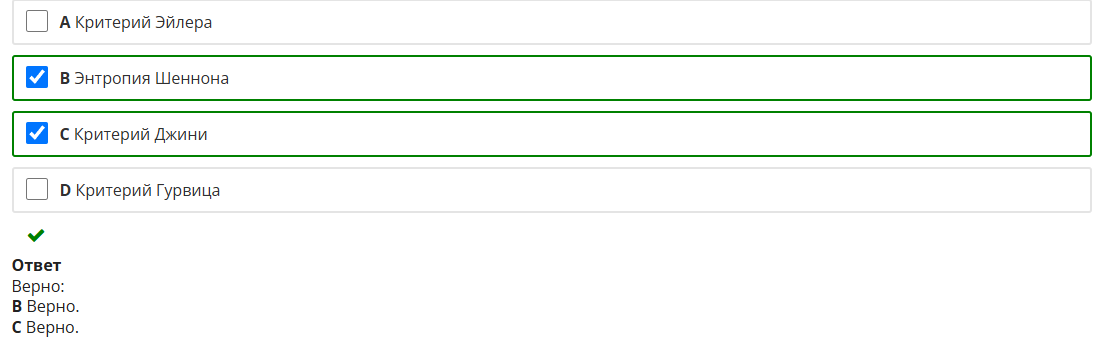